<a href="https://colab.research.google.com/github/salimNabbout/Qualidade_Vinhos_Norte_Portugal/blob/main/Qualidade_Vinho_Tinto_REGRESSAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**POS GRADUAÇÃO EM CIÊNCIAS DE DADOS -  PUC RIO**

##**MVP SPRINT 1**

##**PROJETO - CLASSIFICAÇÃO DE VINHOS DE ALTA QUALIDADE - NORTE DE PORTUGAL**

##**ALUNO: SALIM JORGE NABBOUT**

##**1. JUSTIFICATIVA DO PROJETO**

Esta análise foi solicitada por um grande distribuidor de vinhos, localizado no estado do Rio de janeiro. Esta empresa solicitou uma análise minuciosa dos dados físico-químico de vinhos produzidos ao norte de Portugal, tidos como uns dos melhores vinhos do mundo.

O Objetivo é importar vinhos não somente de Portugal, mas também do Brasil que atendesse as proximidades das características físico-químico dos vinhos analisados. A partir das análises de dados, referenciado pelos vinhos portugueses, cria se uma modelagem para o problema com objetivo de uma melhor tomadas de decisão na hora de avaliar as características dos vinhos a serem adquiridos para venda.

A primeira etapa foi entender o problema. Identificamos que para este distribuidor não interessava vinhos com baixo valor agregado, o que está diretamente ligado a Melhor Qualidade desta bebida.

A segunda etapa foi obter os dados para análise exploratória e o Pré-Processamento. Através da Câmara de Comercio de Vinhos do Norte de Portugal - CCVNP obtivemos o "dataset" dos 1599 diferentes tipos de vinhos fabricados nesta região.

Identificamos que as tarefas associadas a este dataset são: CLASSIFICAÇÃO E REGRESSÃO. O que nos leva a concluir que se trata de um APRENDIZADO SUPERVISIONADO

Junto ao engenheiro de alimentos e ao sommelier do distribuidor, levantamos algumas premissas relacionadas a características físico-químicas que nos remetem a uma qualidade melhor de um vinho. Dentre as principais características, declarada pelo especialista está o pH do vinho, entretanto somente esta informação não nos remete a selecionar o de melhor qualidade. Deverá ser analisado outras características fundamentais para que a Ciências de Dados possa entregar uma modelagem mais assertiva aos interessados.


________________________________________________________________________________

##**2. ANALISE EXPLORATÓRIA DE DADOS**

##**2.1 Etapa de Importação das Bibliotecas**

 2.1.1 Etapa de Importação das Bibliotecas

In [31]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings

# transformação Numerica
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# transformação categórica
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Exibição de Dados no Jupyter Notebook

from IPython.display import display


from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

##**2.2 Caminho de Leitura do Datasets**

2.2.1 Importando dados da URL para o Dataframe

2.2.1.1 URL a importar

In [32]:
Qldvinhos= pd.read_csv(r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

##**2.3 Definição dos Atributos do Datasets**

2.3.1 Labels do Atributos do Dataset

In [33]:
labels_atributos = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', ]

##**2.4 Verificando que o Qldvinhos é um Dataframe**

In [34]:
type(Qldvinhos)

pandas.core.frame.DataFrame

##**2.4.1 Exibindo as Cinco Primeiras Linhas do Dataset**

***Observa se nas duas primeiras linhas do atributo citric acidy ( Acido Citrico) estão zeradas.***

In [35]:
Qldvinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##**2.4.2 Exibindo as Cinco Ultimas Linhas do Dataset Original**

In [36]:
Qldvinhos.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


2.4.3 Exibindo o nome dos Atributos.

Os atributos são do tipo MULTIVARIADA e com seus valores em REAL

In [37]:
Qldvinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##**2.5 Definição dos Atributos do Dataset**

2.5.1 os valores referencias foram fornecidos pelo especialista em vinhos



*   **Fixed Acidity** = a acidez fixa refere-se, basicamente, aos ácidos que não são capazes de se volatilizar, provenientes da fermentação.

Valor referencia - 5.8 - 8.9 g/l

*   **Volatile Acidity** = acidez e aroma muito desagradável, provocado pela presença de teor elevado de ácido acético e de acetato de etila no vinho, compostos produzidos essencialmente por bactérias acéticas.

Valor referencia - 0.009 - 1.210 g/l

*   **Citric Acid** = O ácido cítrico está presente nas uvas em menor quantidade, sendo que nos vinhos apresenta pouca ou nenhuma presença.

Valor referencia - 0.000 - 0.098 g/l

*  **Residual sugar **= o açúcar residual é proveniente da própria uva – pode ser frutose ou glicose – e resta ao final do processo de fermentação.

Valor referencia - 2.00 - 2.500 g/l

*   **chlorides** = Uma adição de sais no vinho. A sua principal função é de antioxidante, mas também possui funções de desinfetante porque é bactericida (em particular) e fungicida, melhorador de aroma e afinador de cor.

Valor referencia - 0.009 - 0.098 mg/l

*   **Free Sulfur Dioxide** = Os sulfitos (SO2) são sais do ácido sulfuroso que são liberados quando o ácido se dissocia.

Valor referencia - 8.5 - 19.3 mg/l

*   **total sulfur dioxide** = O dióxido de enxofre (SO2) é um composto muito importante utilizado na conservação de vinhos, devido às suas propriedades antioxidantes.

Valor referencia - 25.7 - 58.2 mg/l

*  **density** =  Está relacionada principalmente ao seu teor alcoólico e de açúcares residuais.

Valor referencia - 0.095 - 1.000 (Amostra de FT)

*  **pH** = Teor de acidez do vinho, que varia entre o vinho branco e o vinho tinto.

Valor referencia - 3.2 - 3.6

*   **sulphates**= No vinho, o sulfito é utilizado como conservante, devido às suas propriedades antioxidantes e antibacterianas, evitando que os vinhos degradem de forma mais rápida.
Valor referencia - 0.310 - 1.980 ppm

*  **alcohol ** = É o resultado da fermentação dos açúcares da uva (glicose e frutose), que acontece graças a presença de leveduras no mosto.

Valor referencia - 9.5 - 10.2 GL

*   **quality** = As pontuações , onde varia de 0 a 10, onde 0 são vinhos de pessima qualidade e 10 de excelente qualidade









##**2.6 Dimensões do Dataset**

O dataset possui 1599 linhas, 12 atributos e 4898 instâncias

In [38]:
Qldvinhos.shape

(1599, 12)

##**2.7 Exibindo a Quantidade de Linhas do Dataset**

In [39]:
Qldvinhos.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

##**3. SUMÁRIO ESTATISTICO**

Analisando o Sumário estatistico, observamos que as variáveis : volatile acidity, citric acid, chlorides, density, pH, sulphate, apresentam baixo desvio padrão (std). Eliminaremos estas variáves da analise de dados, pois praticamente não há muita dispersão nos dados destes atributos.

Estes dados não serão eliminados do dataframe. Eles não serão analisados individualmente como os outros atributos.



In [40]:
Qldvinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##**4. PRÉ-PROCESSAMENTO**

##**4.1 Carregamento o Dataset ORIGINAL**

In [41]:
# Informa a URL de importação do dataset
url = (r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##**4.2 Tratamento de MISSING**

Verificando os Valores faltantes no Datasets


In [42]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nesta etapa será salvo um novo arquivo, chamado de Dataset em substituição ao original "Qldvinhos" para executar o tratamento de MISSING.

Observamos na coluna do atributo citric acidity, que existem valores nulos. Este atrubuto deverá sofrer um tratamento na sequencia do pré processamento

<Axes: >

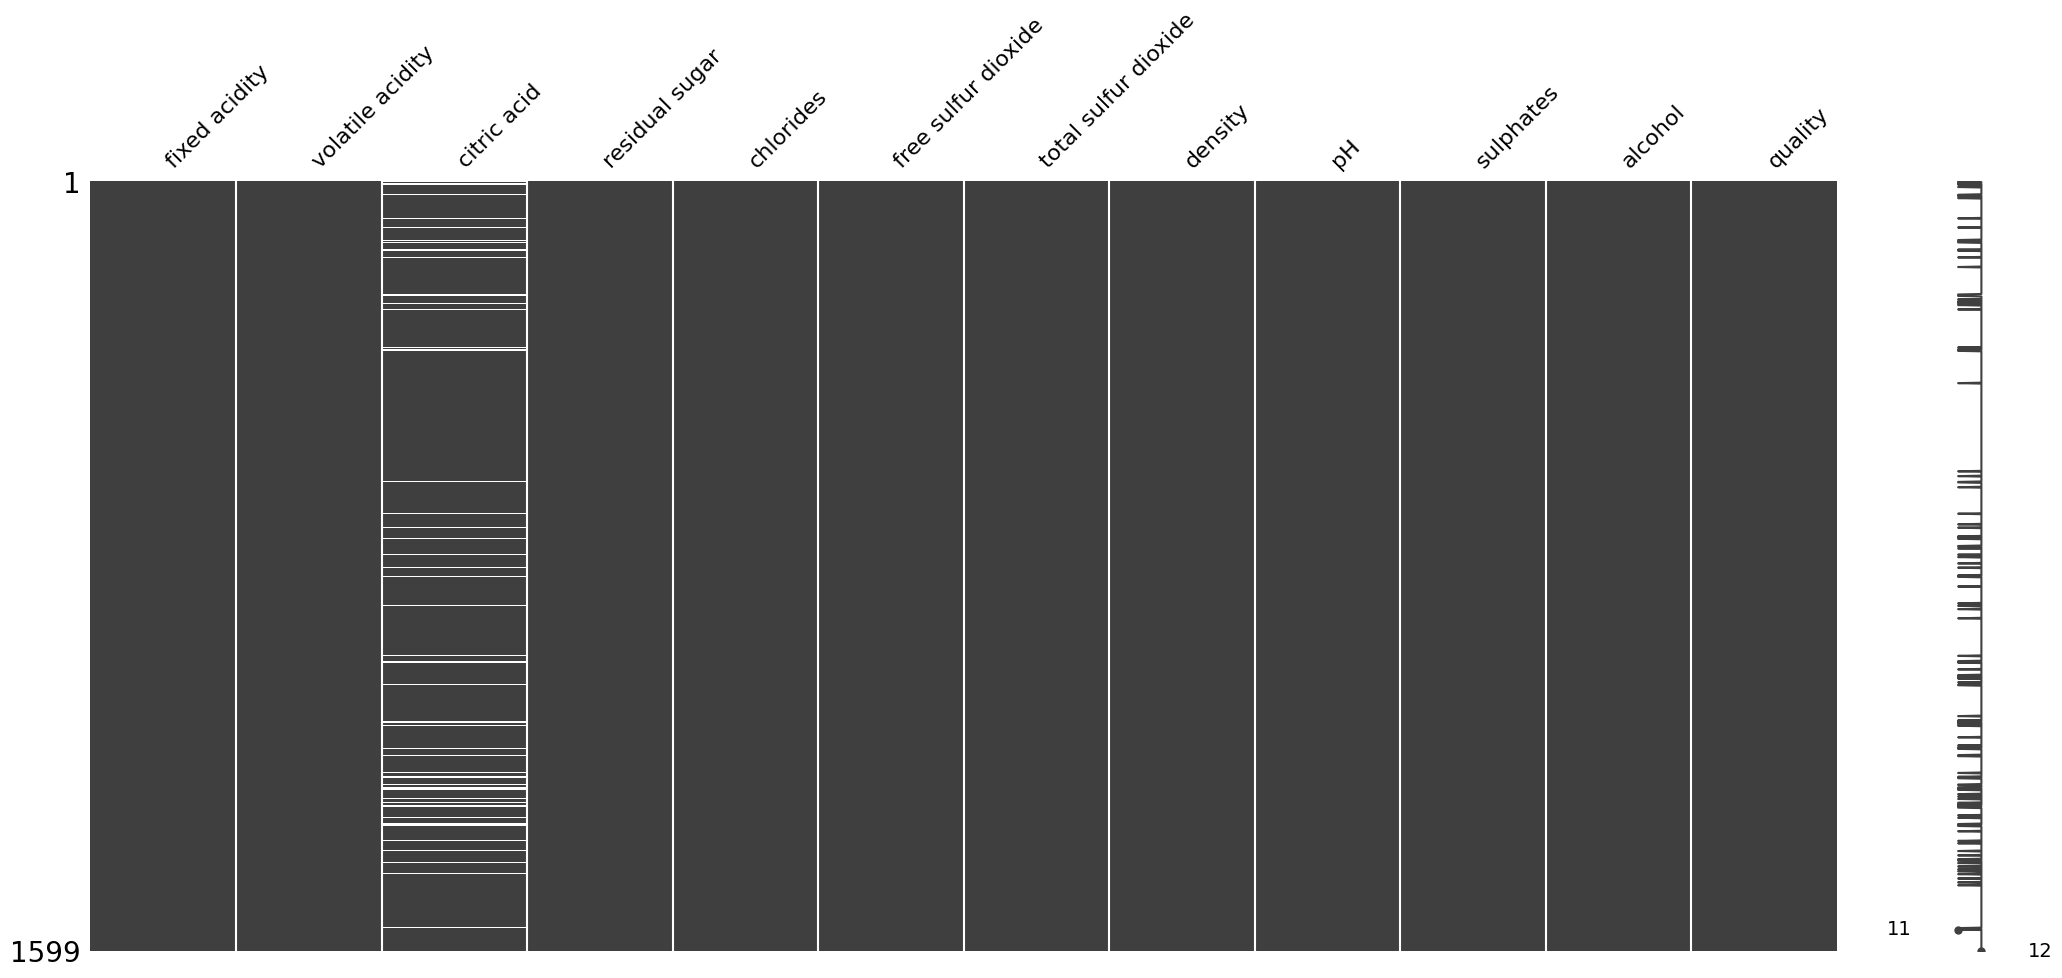

In [43]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

##**4.3 Reverificando o Dataset Apos as Substituições dos Zeros por NaN**

In [44]:
datasetSemMissings.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

##**4.4 Tratando O DATASET**

Existem 132 valores zerados na coluna do "citric acid", como este valor representa apenas 8,2% do total dos valores desta coluna, iremos substituir esses valores faltantes pela mediana da coluna.

Substituindo os NaN de "citric acid" pela mediana do atributo

Exibindo a Matriz de nulidade do dataset apos tratamento

<Axes: >

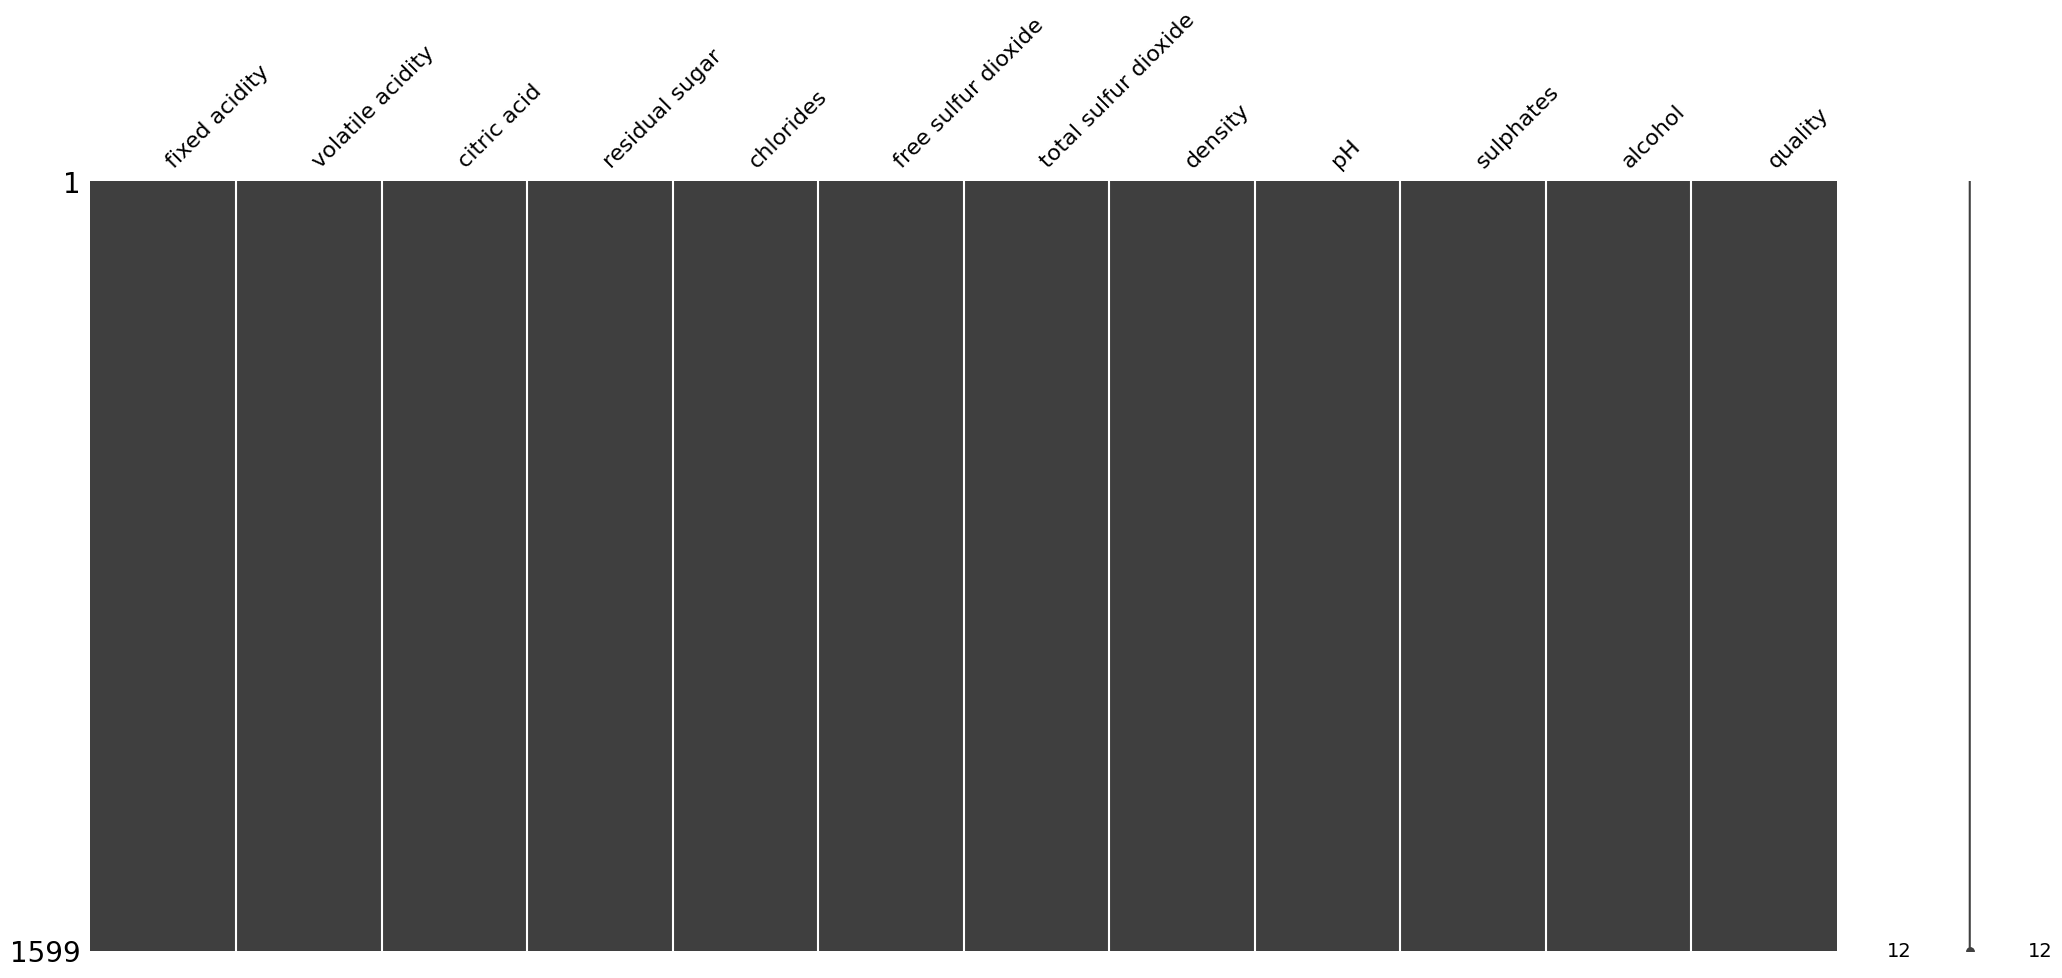

In [45]:
datasetSemMissings['citric acid'].fillna(datasetSemMissings['citric acid'].median(), inplace=True)

ms.matrix(datasetSemMissings)

##**4.5 Vereificando os NULLS do Dataset Tratado**

In [46]:
datasetSemMissings.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
# Carga do dataset

datasetSemMissings.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.28,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = datasetSemMissings.values
X = array[:,0:11] # atributos
y = array[:,11] # classe (quality)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 0.44 (0.07) - RMSE 0.66
Ridge: MSE 0.44 (0.07) - RMSE 0.66
Lasso: MSE 0.65 (0.11) - RMSE 0.81
KNN: MSE 0.60 (0.11) - RMSE 0.77
CART: MSE 0.65 (0.11) - RMSE 0.81
SVM: MSE 0.57 (0.11) - RMSE 0.75


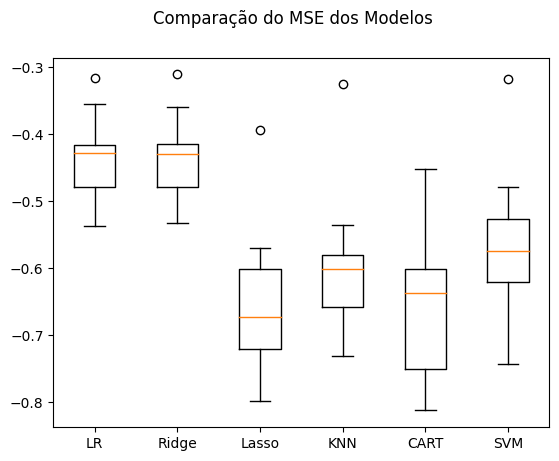

In [49]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.38
RMSE 0.61


# Recursos Avançados Aplicados ao Aprendizado Supervisionado

In [51]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:11] # atributos
y = array[:,11] # quality(target)

In [52]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:11]))


Número original de atributos: 11

Número reduzido de atributos: 4

Atributos Originais: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Scores dos Atributos Originais: [  6.283  60.914  19.691   1.053   6.036   4.754  25.479  13.396   4.342
  22.273 115.855]

Atributos Selecionados: ['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


In [53]:
 #Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:13])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:11]))

Atributos Originais: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Atributos Selecionados: [False  True False False  True False False False  True  True False]

Ranking de atributos: [5 1 4 6 1 7 8 2 1 1 3]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['volatile acidity' 'chlorides' 'pH' 'sulphates']


In [54]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.078 0.098 0.08  0.081 0.076 0.075 0.1   0.087 0.077 0.101 0.148]


## Separação em conjunto de treino e conjunto de teste com holdout

In [55]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.581730 (0.035900)
KNN: 0.502768 (0.043741)
CART: 0.589505 (0.028259)
NB: 0.559787 (0.037451)
SVM: 0.494131 (0.042979)
Bagging: 0.671629 (0.021935)
RF: 0.679454 (0.027095)
ET: 0.675535 (0.019397)
Ada: 0.495755 (0.089910)
GB: 0.635642 (0.027686)
Voting: 0.591086 (0.034054)


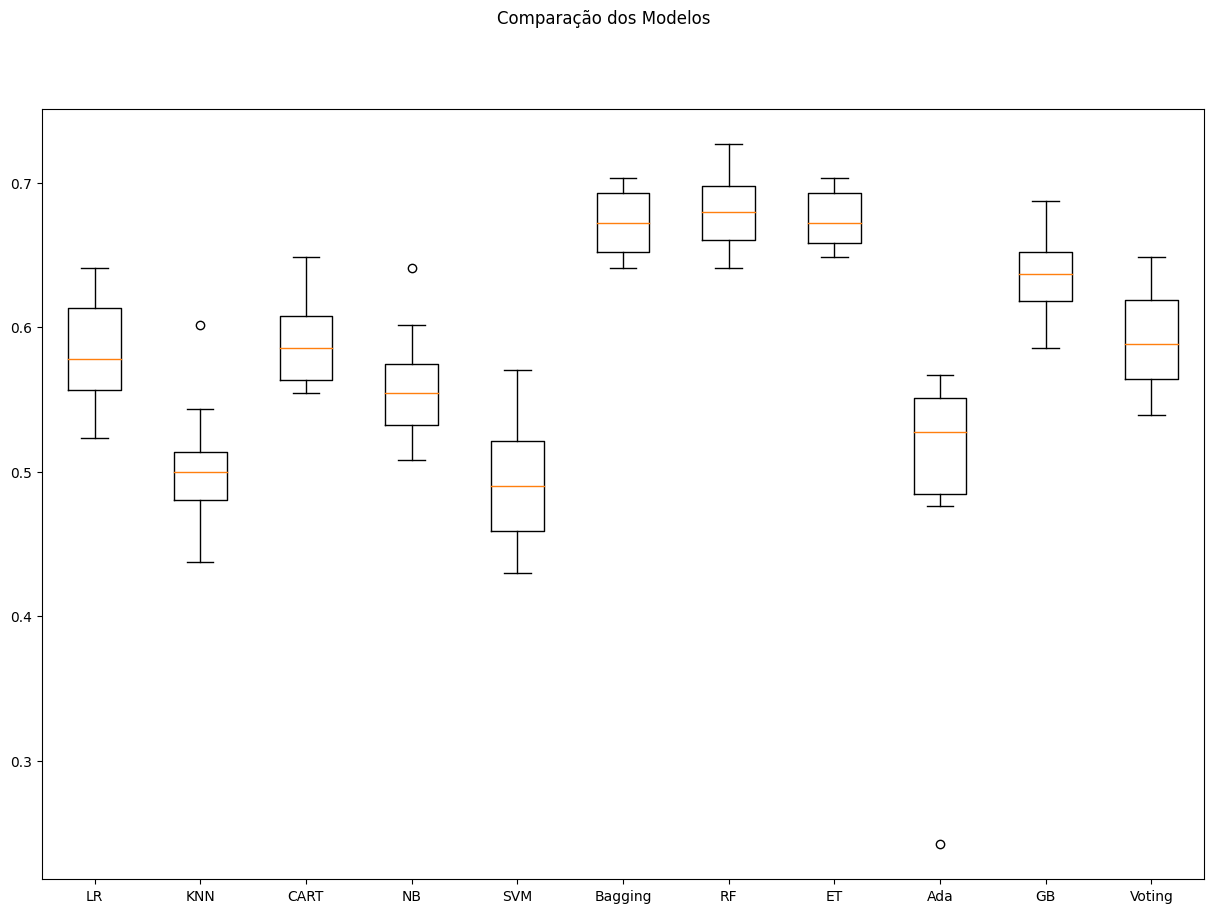

In [56]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.582 (0.036)
KNN-orig: 0.503 (0.044)
CART-orig: 0.590 (0.028)
NB-orig: 0.560 (0.037)
SVM-orig: 0.494 (0.043)
Bag-orig: 0.672 (0.022)
RF-orig: 0.679 (0.027)
ET-orig: 0.676 (0.019)
Ada-orig: 0.496 (0.090)
GB-orig: 0.636 (0.028)
Vot-orig: 0.591 (0.034)
LR-padr: 0.584 (0.041)
KNN-padr: 0.586 (0.031)
CART-padr: 0.593 (0.025)
NB-padr: 0.557 (0.042)
SVM-padr: 0.617 (0.032)
Bag-padr: 0.682 (0.024)
RF-padr: 0.685 (0.033)
ET-padr: 0.683 (0.026)
Ada-padr: 0.496 (0.090)
GB-padr: 0.635 (0.028)
Vot-padr: 0.608 (0.036)
LR-norm: 0.580 (0.036)
KNN-norm: 0.578 (0.033)
CART-norm: 0.583 (0.030)
NB-norm: 0.557 (0.042)
SVM-norm: 0.613 (0.033)
Bag-norm: 0.689 (0.030)
RF-norm: 0.680 (0.032)
ET-norm: 0.673 (0.028)
Ada-norm: 0.495 (0.089)
GB-norm: 0.640 (0.025)
Vot-norm: 0.604 (0.029)


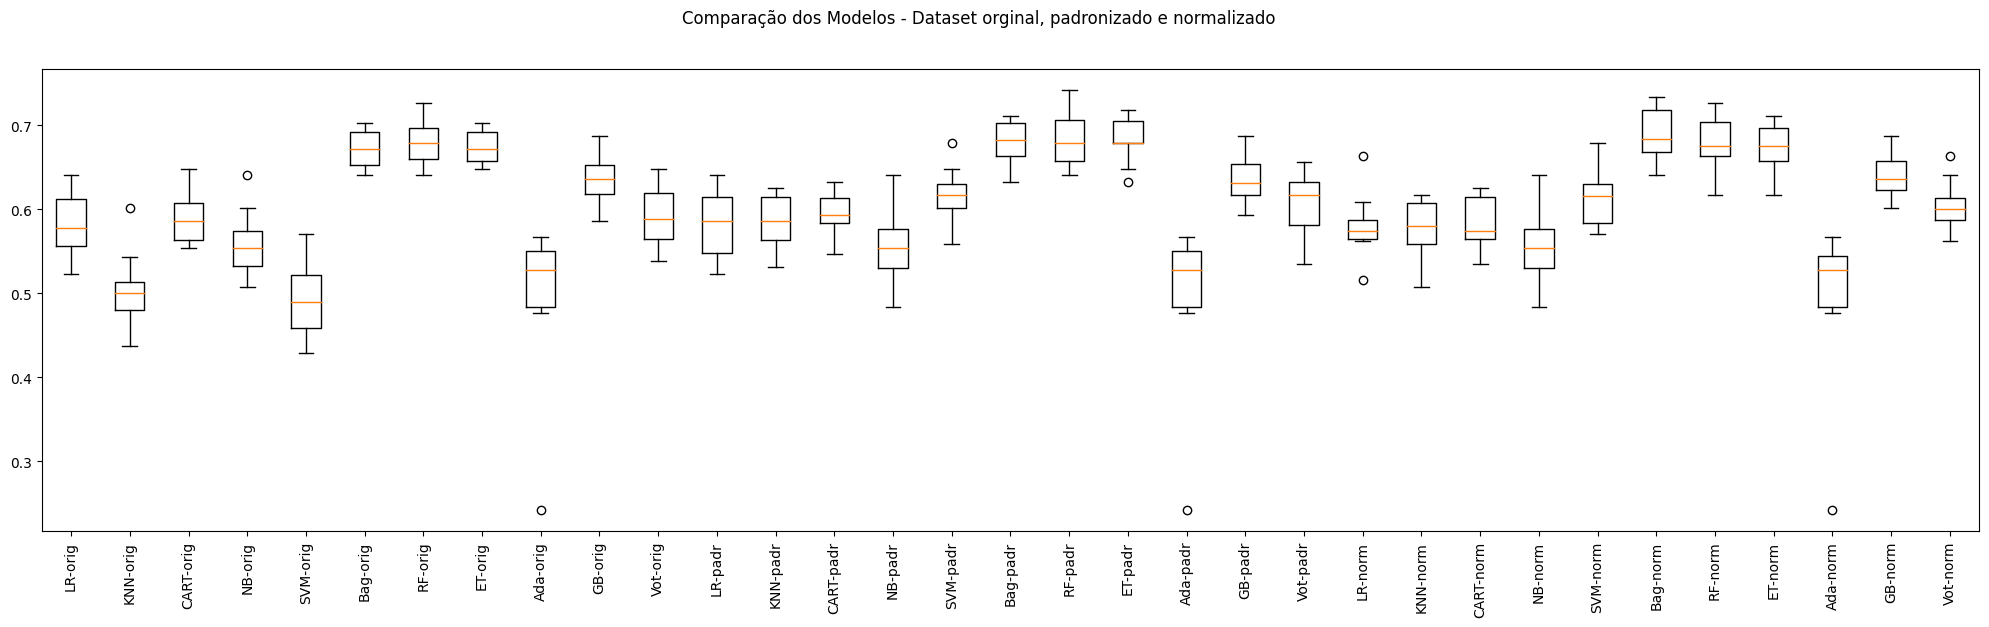

In [57]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [58]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.572336 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.625498 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.623917 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


## Finalização do Modelo

In [59]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.6125


In [60]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

In [66]:
datasetSemMissings.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.28,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Simulando a aplicação do modelo em dados não vistos

In [67]:
# Novos dados - não sabemos a classe!
data = {'fixed acidity':  [7.7, 9.5, 10.5],
        'volatile acidity': [0.86, 0.38, 0.79],
        'citric acid': [0.45, 0.60, 0.37],
        'residual sugar': [3.1, 1.7, 2.8],
        'chlorides': [0.082, 0.062, 0.087],
        'free sulfur dioxide': [28.0, 32.0, 19.0],
        'total sulfur dioxide': [64.0, 82.0, 51.0],
        'density': [0.09876, 0.9987, 0.9965],
        'pH' : [3.89, 3.96, 3.64],
        'sulphates' : [0.57, 0.63, 0.51],
        'alcohol': [9.1, 9.9, 9.5 ]
        }

atributos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-3.560e-01  1.856e+00  9.193e-01  3.982e-01 -1.162e-01  1.160e+00
   5.331e-01 -4.759e+02  3.751e+00 -5.202e-01 -1.242e+00]
 [ 6.782e-01 -8.258e-01  1.690e+00 -5.951e-01 -5.413e-01  1.542e+00
   1.080e+00  1.035e+00  4.204e+00 -1.661e-01 -4.909e-01]
 [ 1.253e+00  1.465e+00  5.085e-01  1.853e-01 -9.916e-03  2.989e-01
   1.378e-01 -1.307e-01  2.131e+00 -8.743e-01 -8.664e-01]]


In [68]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[4. 5. 4.]
